In [341]:
### Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [366]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

80
80


In [367]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [368]:
name = []
id = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    try:    
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        id.append(response['id'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except:
        continue
    
#print(f'Lat is {lat}')
#print(f'Lng is {lng}')
#print(f'Temp is {temp}')
#print(f'Humidity is {humidity}')
#print(f'Cloudiness is {cloudiness}')
#print(f'Wind speed is {wind_speed}')
print(len(name))
print(len(id))
print(len(lat))
print(len(lng))
print(len(temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))

76
76
76
76
76
76
76
76


In [369]:
#create dataframe

weather_dict = {
    'city': name,
    'id': id,
    'lat': lat,
    'lng': lng,
    'temp': temp,
    'humidity': humidity,
    'clouds': cloudiness,
    'wind_speed': wind_speed
}
    
weather_data = pd.DataFrame(weather_dict)
weather_data

city       id    lat     lng   temp  humidity  clouds  wind_speed
0      Hithadhoo  1282256  -0.60   73.08  83.10        80     100       15.68
1           Beba  3543961  22.44  -79.73  64.40       100      75       14.99
2   Norman Wells  6089245  65.28 -126.83 -14.80        75      20        3.36
3         Dingle  1714733  11.00  122.67  70.50        91      69       12.08
4   Punta Arenas  3874787 -53.15  -70.92  55.96        54      40       28.86
..           ...      ...    ...     ...    ...       ...     ...         ...
71        Atuona  4020109  -9.80 -139.03  80.78        74      38       13.00
72         Tokur  2015217  53.13  132.90 -15.38        96     100        2.19
73        Albany  5106841  42.60  -73.97  21.94        41      20        8.05
74       Homberg  2899478  51.03    9.40  26.26        92      40        2.48
75       Salalah   286621  17.02   54.09  73.40        64      20        2.42

[76 rows x 8 columns]

In [370]:
lat_values = weather_data['lat']
temp_values = weather_data['temp']
humidity_values = weather_data['humidity']
clouds_values = weather_data['clouds']
wind_speed_values = weather_data['wind_speed']

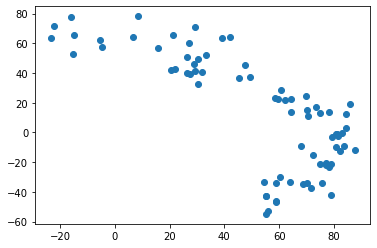

In [371]:
plt.scatter(temp_values, lat_values)

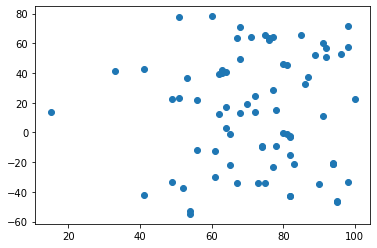

In [372]:
plt.scatter(humidity_values, lat_values)

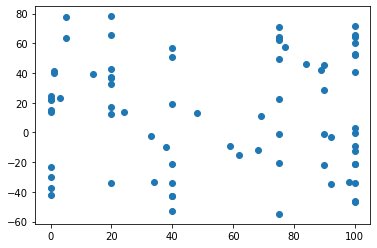

In [373]:
plt.scatter(clouds_values, lat_values)

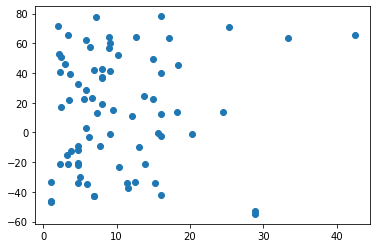

In [374]:
plt.scatter(wind_speed_values, lat_values)

In [375]:
north_hem = weather_data.loc[weather_data['lat'] >= 0]
north_hem

city       id    lat     lng   temp  humidity  clouds  \
1               Beba  3543961  22.44  -79.73  64.40       100      75   
2       Norman Wells  6089245  65.28 -126.83 -14.80        75      20   
3             Dingle  1714733  11.00  122.67  70.50        91      69   
7        Provideniya  4031574  64.38 -173.30   6.80        77      75   
8            Birjand   140463  32.87   59.22  30.20        86      20   
9             Hirara  1862505  24.80  125.28  69.80        72       0   
10           Gigmoto  1712961  13.78  124.39  78.24        72      24   
11              Aden   415189  12.78   45.04  74.84        68      48   
14      San Patricio  3985168  19.22 -104.70  86.00        70      40   
17          Beatrice  5063646  40.27  -96.75  26.19        63       1   
18   Yangi Marg`ilon  1513491  40.43   71.72  32.00        64     100   
20           Iqaluit  5983720  63.75  -68.51 -23.44        67       5   
22    Saint-Francois  2980080  46.42    3.91  29.01        80      84   
23        Nanortalik  3421765  60.14  -45.24  27.05        91     100   
24          Bilaspur  1275637  22.08   82.15  62.29        56       0   
25             Seydi  1218420  39.48   62.91  27.28        62      14   
27          Khatanga  2022572  71.97  102.50 -22.05        98     100   
33  Mazara del Vallo  6541759  37.66   12.59  49.33        87      20   
34        Butaritari  2110227   3.07  172.79  84.49        64     100   
36            Abeche   245785  13.83   20.83  64.33        15       0   
38        Sao Filipe  3374210  14.90  -24.50  70.20        78       0   
41       Kapuskasing  5989403  49.42  -82.43  30.20        68      75   
42       Pervouralsk   510808  56.91   59.94  15.80        92      40   
43         Beaverton  5713376  45.49 -122.80  47.55        81      90   
45            Mehamn   778707  71.04   27.85  29.19        68      75   
46        Swan River  6160362  52.11 -101.27  33.46        89     100   
47        Willemstad  3513090  12.11  -68.93  84.20        62      20   
48    La Providencia  3991622  28.72 -111.58  60.67        77      90   
49      Longyearbyen  2729907  78.22   15.64   8.60        60      20   
50       Yellowknife  6185377  62.46 -114.35  -5.44        76      75   
53           Qaanaaq  3831208  77.48  -69.36 -15.88        51       5   
54          Tasiilaq  3424607  65.61  -37.64  21.20        85     100   
56         Mathbaria  1185239  22.29   89.96  59.58        49       0   
57            Venado  3980487  22.93 -101.08  58.59        51       3   
59            Bethel  5282297  41.37  -73.41  29.16        33       1   
61         Kyzyl-Suu  1527497  42.34   78.00  20.44        63      89   
66         Sistranda  3139597  63.73    8.83  39.20        76      75   
68              Hofn  2630299  64.25  -15.21  42.17        71     100   
69            Tevriz  1489661  57.51   72.40  -4.50        98      77   
70             Erzin   296852  36.96   36.20  45.34        53      20   
72             Tokur  2015217  53.13  132.90 -15.38        96     100   
73            Albany  5106841  42.60  -73.97  21.94        41      20   
74           Homberg  2899478  51.03    9.40  26.26        92      40   
75           Salalah   286621  17.02   54.09  73.40        64      20   

    wind_speed  
1        14.99  
2         3.36  
3        12.08  
7         8.95  
8         4.70  
9        13.80  
10       24.52  
11        7.29  
14        8.05  
17       16.11  
18        2.24  
20       17.22  
22        2.95  
23        9.15  
24        3.49  
25        3.65  
27        2.08  
33        8.05  
34        5.79  
36       18.25  
38        9.46  
41       14.99  
42        8.95  
43       18.34  
45       25.28  
46       10.20  
47       16.11  
48        5.82  
49       16.11  
50        5.82  
53        7.14  
54       42.50  
56        5.61  
57        6.71  
59        9.17  
61        6.96  
66       33.33  
68       12.66  
69        6.33  
70        8.05  
72        2.19  
73        8.05  

In [376]:
south_hem = weather_data.loc[weather_data['lat'] < 0]
south_hem

city       id    lat     lng   temp  humidity  clouds  \
0             Hithadhoo  1282256  -0.60   73.08  83.10        80     100   
4          Punta Arenas  3874787 -53.15  -70.92  55.96        54      40   
5                 Airai  1651810  -8.93  125.41  68.11        78     100   
6             Cape Town  3369157 -33.93   18.42  70.02        73      20   
12         Puerto Ayora  3652764  -0.74  -90.35  80.82        65      75   
13              Itarema  3393692  -2.92  -39.92  79.12        82      92   
15              Rikitea  4030556 -23.12 -134.97  78.30        77       0   
16                Vaini  4032243 -21.20 -175.20  78.80        83      40   
19          Port Alfred   964432 -33.59   26.89  64.00        98      98   
21      Bambous Virieux  1106677 -20.34   57.76  77.00        94      75   
26                 Lamu   189741  -2.27   40.90  81.63        82      33   
28       Saint-Philippe   935215 -21.36   55.77  74.82        94     100   
29               Avarua  4035715 -21.21 -159.78  77.00        94     100   
30                Bluff  2206939 -46.60  168.33  59.00        95     100   
31              Ushuaia  3833367 -54.80  -68.30  55.24        54      75   
32              Mataura  6201424 -46.19  168.86  59.00        95     100   
35            Busselton  2075265 -33.65  115.33  54.63        49      34   
37  Sao Joao do Paraiso  3448861 -15.31  -42.01  72.37        82      62   
39             Hermanus  3366880 -34.42   19.23  68.68        90      92   
40           Carutapera  3402648  -1.20  -46.02  81.12        81      90   
44               Hobart  2163355 -42.88  147.33  55.31        82      40   
51                 Chui  3443061 -33.70  -53.46  75.79        75     100   
52    Sao Joao da Barra  3448903 -21.64  -41.05  77.00        65      90   
55                Ancud  3899695 -41.87  -73.82  78.80        41       0   
58          New Norfolk  2155415 -42.78  147.06  55.13        82      40   
60            Springbok  3361142 -29.66   17.89  60.39        61       0   
62                 Auki  2109701  -8.77  160.70  83.57        74      59   
63            Esperance  2071860 -33.87  121.90  59.00        67      40   
64            Ibotirama  3461525 -12.19  -43.22  82.22        61     100   
65               Pangoa  3933104 -12.12  -73.00  87.62        56      68   
67                 Lebu  3883457 -37.62  -73.65  71.44        52       0   
71               Atuona  4020109  -9.80 -139.03  80.78        74      38   

    wind_speed  
0        15.68  
4        28.86  
5         4.74  
6         4.70  
12        9.17  
13        6.20  
15       10.40  
16        2.24  
19        1.01  
21        4.70  
26       16.13  
28       13.87  
29        3.36  
30        1.01  
31       28.86  
32        1.01  
35       12.48  
37        3.20  
39        5.99  
40       20.27  
44        6.93  
51       15.21  
52        4.70  
55       16.11  
58        6.93  
60        5.06  
62        7.81  
63       11.41  
64        3.80  
65        4.74  
67       11.50  
71       13.00

In [379]:
north_temp = north_hem['temp']
south_temp = south_hem['temp']
north_lat = north_hem['lat']
south_lat = south_hem['lat']
north_humid = north_hem['humidity']
south_humid = south_hem['humidity']
north_clouds = north_hem['clouds']
south_clouds = south_hem['clouds']
north_wind = north_hem['wind_speed']
south_wind = south_hem['wind_speed']

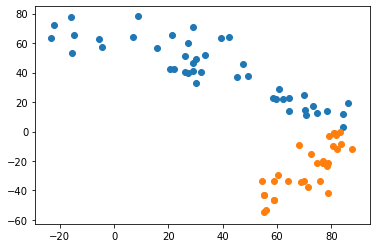

In [380]:
plt.scatter(north_temp, north_lat)
plt.scatter(south_temp, south_lat)

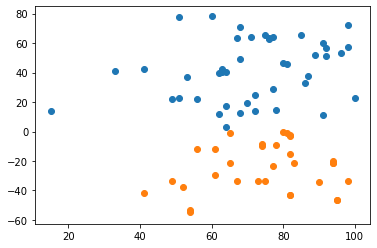

In [381]:
plt.scatter(north_humid, north_lat)
plt.scatter(south_humid, south_lat)

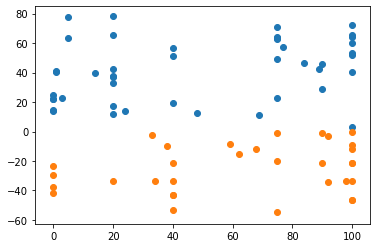

In [382]:
plt.scatter(north_clouds, north_lat)
plt.scatter(south_clouds, south_lat)

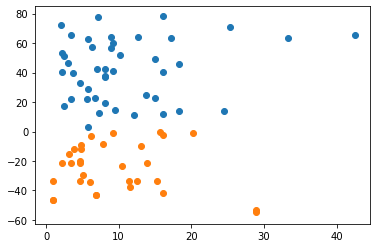

In [383]:
plt.scatter(north_wind, north_lat)
plt.scatter(south_wind, south_lat)